Initial Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin      

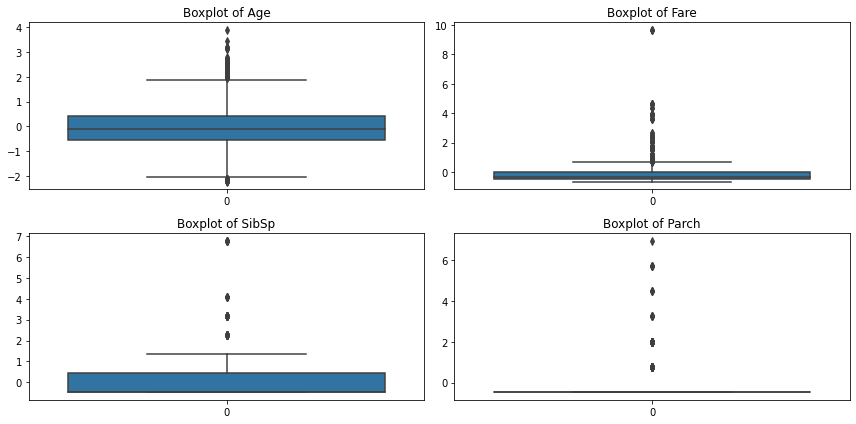


Cleaned Data Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  577 non-null    int64  
 1   Pclass    577 non-null    int64  
 2   Sex       577 non-null    int32  
 3   Age       577 non-null    float64
 4   SibSp     577 non-null    float64
 5   Parch     577 non-null    float64
 6   Fare      577 non-null    float64
 7   Embarked  577 non-null    int32  
dtypes: float64(4), int32(2), int64(2)
memory usage: 36.1 KB
None
   Survived  Pclass  Sex       Age     SibSp     Parch      Fare  Embarked
0         0       3    1 -0.565736  0.432793 -0.473674 -0.502445         2
2         1       3    0 -0.258337 -0.474545 -0.473674 -0.488854         2
3         1       1    0  0.433312  0.432793 -0.473674  0.420730         2
4         0       3    1  0.433312 -0.474545 -0.473674 -0.486337         2
5         0       3    1 -0.104637 -0.474545

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Load the dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Display basic information
print("Initial Data Info:\n")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nSample Data:\n", df.head())

# Step 2: Handle missing values
# Fill missing 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Step 3: Convert categorical features using encoding
label_encoders = {}
categorical_cols = ['Sex', 'Embarked']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for possible inverse_transform

# Drop unnecessary columns
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

# Step 4: Normalize/standardize numerical features
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Step 5: Visualize outliers using boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Remove outliers using IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Final cleaned data info
print("\nCleaned Data Info:\n")
print(df.info())
print(df.head())
